<a href="https://colab.research.google.com/github/Saumya2005-dot/Saumya2005-dot/blob/main/Post_COVID_Effects_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Load Required Libraries**

In [1]:
!pip install seaborn pandas matplotlib scikit-learn --quiet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ML tools
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score


# **2. Upload the file**

In [2]:
from google.colab import files
uploaded = files.upload()


Saving economic data.csv to economic data.csv


# **3. Read the CSV**

In [3]:
import pandas as pd

df = pd.read_csv("economic data.csv")
df.head()


,country,date,manufacturing pmi,services pmi,consumer confidence,interest rates,cpi yoy,core cpi,unemployment rate,gdp yoy,ticker,open,high,low,close
0,australia,2020-01-01,49.6,50.6,93.4,0.75%,2.20%,1.70%,5.20%,1.20%,audusd,0.7021,0.7031,0.6682,0.6691
1,australia,2020-02-01,50.2,49.0,95.5,0.75%,2.20%,1.70%,5.10%,1.20%,audusd,0.6690,0.6776,0.6434,0.6509
2,australia,2020-03-01,49.7,38.5,91.9,0.50%,2.20%,1.70%,5.20%,1.20%,audusd,0.6488,0.6686,0.5507,0.6135
3,australia,2020-04-01,44.1,19.5,75.6,0.25%,-0.30%,1.20%,6.30%,-6.10%,audusd,0.6133,0.6571,0.5979,0.6510
4,australia,2020-05-01,44.0,26.9,88.1,0.25%,-0.30%,1.20%,7.00%,-6.10%,audusd,0.6511,0.6684,0.6371,0.6666


# **4. Data Cleaning & EDA (Exploratory Data Analysis)**

# **4A:Data Cleaning**


In [4]:
# Copy of original data
data = df.copy()

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Remove '%' and convert relevant columns to float
percent_cols = ['interest rates', 'cpi yoy', 'core cpi', 'unemployment rate', 'gdp yoy']
for col in percent_cols:
    data[col] = data[col].str.replace('%', '').astype(float)

# Confirm changes
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   country              432 non-null    object        
 1   date                 432 non-null    datetime64[ns]
 2   manufacturing pmi    432 non-null    float64       
 3   services pmi         432 non-null    float64       
 4   consumer confidence  432 non-null    float64       
 5   interest rates       432 non-null    float64       
 6   cpi yoy              432 non-null    float64       
 7   core cpi             432 non-null    float64       
 8   unemployment rate    432 non-null    float64       
 9   gdp yoy              432 non-null    float64       
 10  ticker               432 non-null    object        
 11  open                 432 non-null    float64       
 12  high                 432 non-null    float64       
 13  low                  432 non-null  

# **4B:Summary Statistics and Missing Values**


In [5]:
# Summary statistics
data.describe()

# Check for missing values
data.isnull().sum()


,0
country,0
date,0
manufacturing pmi,0
services pmi,0
consumer confidence,0
interest rates,0
cpi yoy,0
core cpi,0
unemployment rate,0
gdp yoy,0


# **4C: Correlation Heatmap**



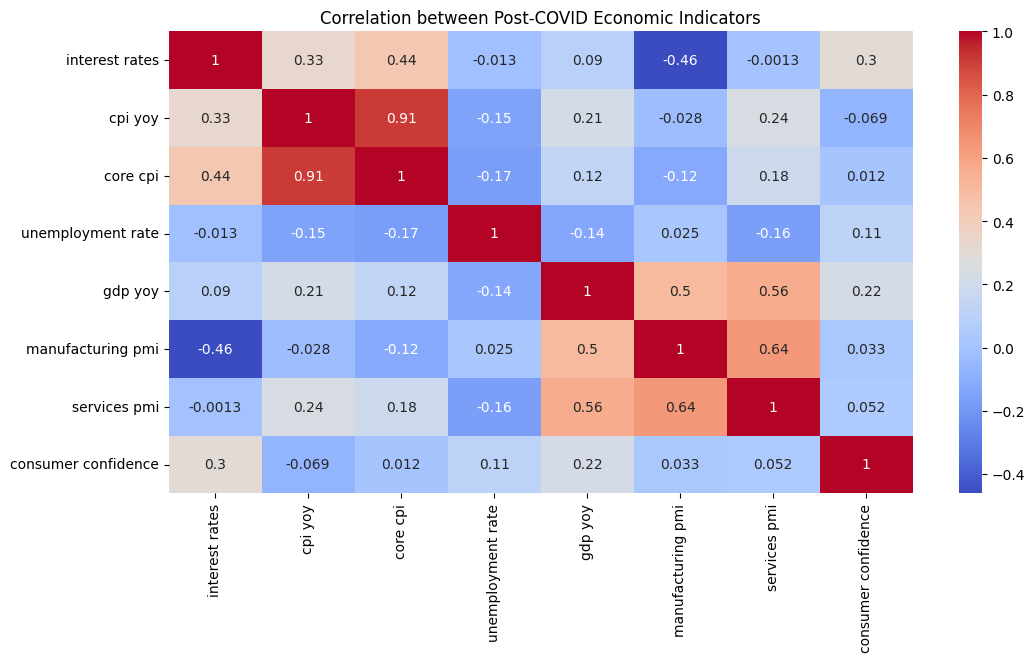

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(data[percent_cols + ['manufacturing pmi', 'services pmi', 'consumer confidence']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation between Post-COVID Economic Indicators")
plt.show()


# **4D: Line Plot – Unemployment & GDP Over Time**

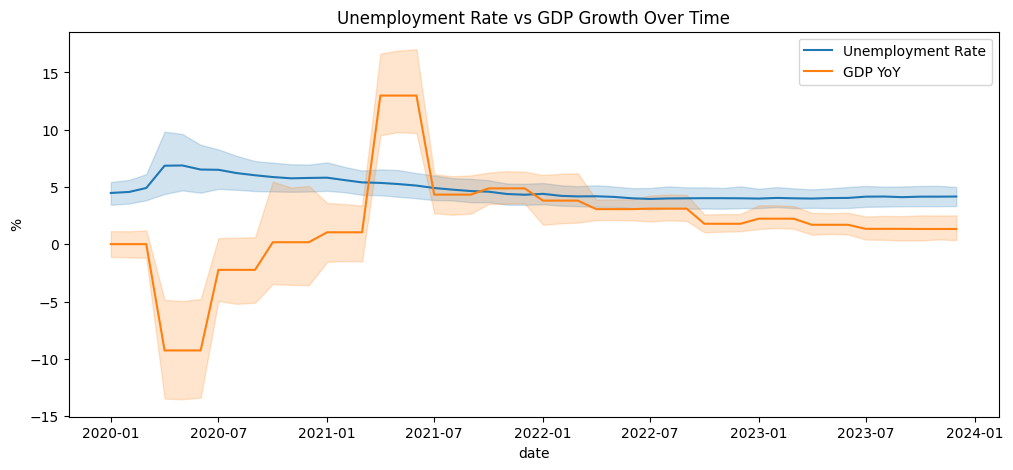

In [7]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='unemployment rate', data=data, label='Unemployment Rate')
sns.lineplot(x='date', y='gdp yoy', data=data, label='GDP YoY')
plt.title('Unemployment Rate vs GDP Growth Over Time')
plt.ylabel('%')
plt.legend()
plt.show()


## **5. Machine Learning Modeling**

# **5A: KMeans Clustering — Group similar economic patterns**

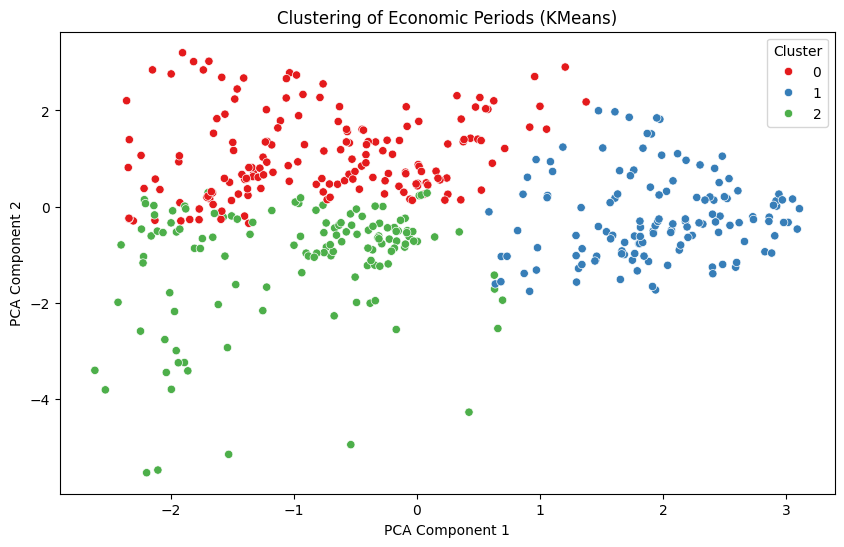

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Features for clustering
features = ['manufacturing pmi', 'services pmi', 'consumer confidence',
            'interest rates', 'cpi yoy', 'core cpi', 'unemployment rate']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA for 2D visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Plot Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=data['Cluster'], palette='Set1')
plt.title('Clustering of Economic Periods (KMeans)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


# **5B:Linear Regression — Predict GDP growth**

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Prepare data
X = data[features]
y = data['gdp yoy']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")


R² Score: 0.54
RMSE: 3.31


# **5C: Plot Actual vs Predicted GDP**

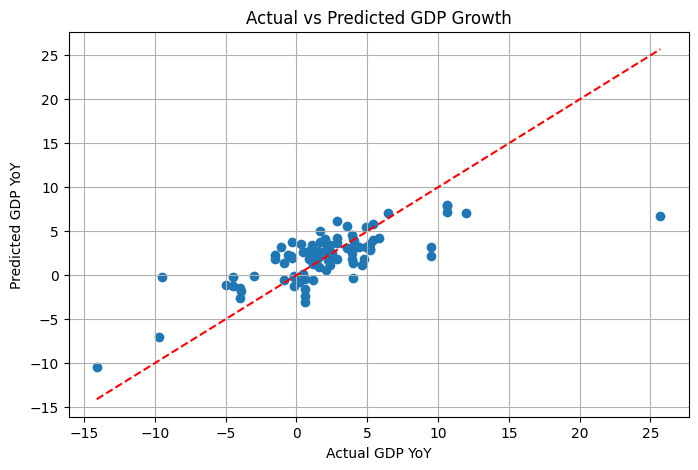

In [14]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual GDP YoY')
plt.ylabel('Predicted GDP YoY')
plt.title('Actual vs Predicted GDP Growth')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()



## 🇮🇳 Integration of India's Economic Data Post-COVID
